In [18]:
CUDA_VISIBLE_DEVICES=""

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
import glob
import datetime

%matplotlib inline

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [19]:
SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

tf.keras.utils.set_random_seed(42)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [20]:
img_height = 224
img_width = 224
batch_size = 32
data_dir = "scaled_chest_xray"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
    

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory=train_dir,
  validation_split=0.2,
  subset="training",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  directory=train_dir,
  validation_split=0.2,
  subset="validation",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(train_ds.class_names)

Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
['NORMAL', 'PNEUMONIA']


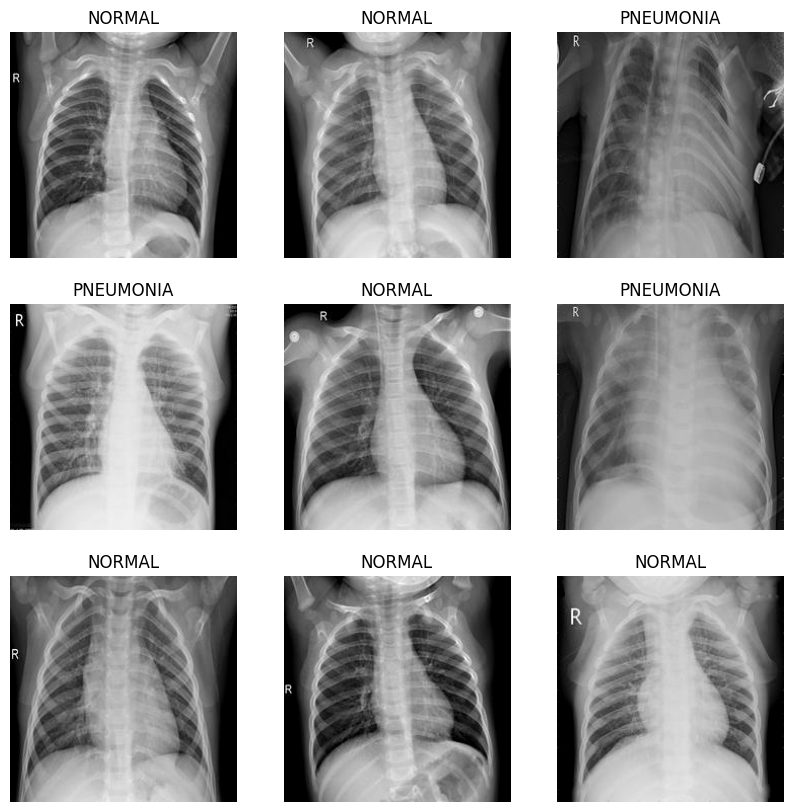

In [22]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [23]:
def get_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_width, img_height, 3)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
  ])
  return model

In [24]:
keras.backend.clear_session()
model = get_model()
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 150)               22579350  
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 22,579,501
Trainable params: 22,579,501
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(train_ds,
          batch_size = batch_size, epochs = 10,
          validation_data=val_ds,
          steps_per_epoch=len(train_ds),
          validation_steps=len(val_ds))

Epoch 1/10
131/131 [==============================] - 11s 80ms/step - loss: 3.9870 - binary_accuracy: 0.7387 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 2/10
131/131 [==============================] - 12s 88ms/step - loss: 3.9161 - binary_accuracy: 0.7432 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 3/10
131/131 [==============================] - 10s 77ms/step - loss: 3.9161 - binary_accuracy: 0.7432 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 4/10
131/131 [==============================] - 8s 61ms/step - loss: 3.9161 - binary_accuracy: 0.7432 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 5/10
131/131 [==============================] - 8s 58ms/step - loss: 3.9161 - binary_accuracy: 0.7432 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 6/10
131/131 [==============================] - 9s 69ms/step - loss: 3.9161 - binary_accuracy: 0.7432 - val_loss: 3.9945 - val_binary_accuracy: 0.7380
Epoch 7/10
131/131 [==============================] - 1

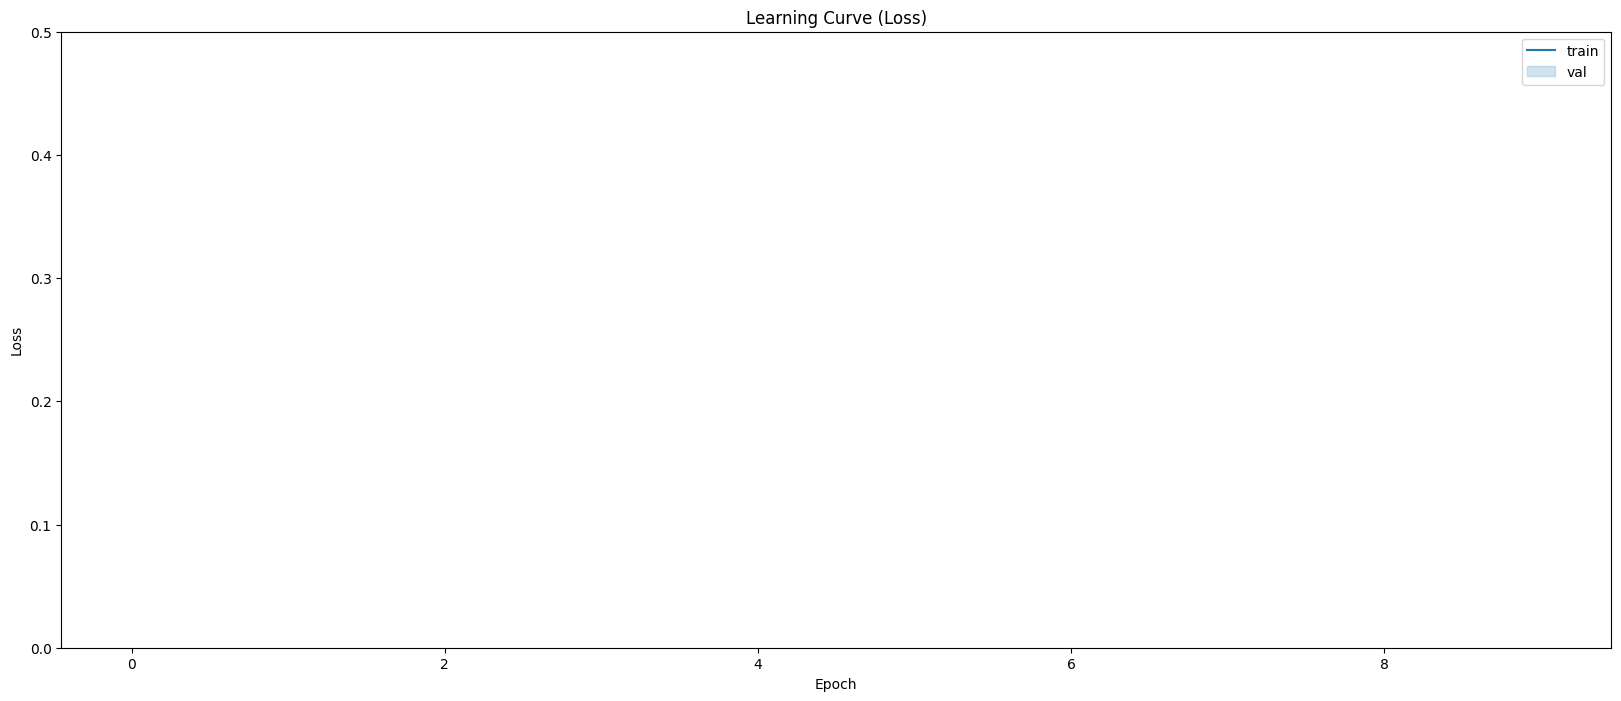

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

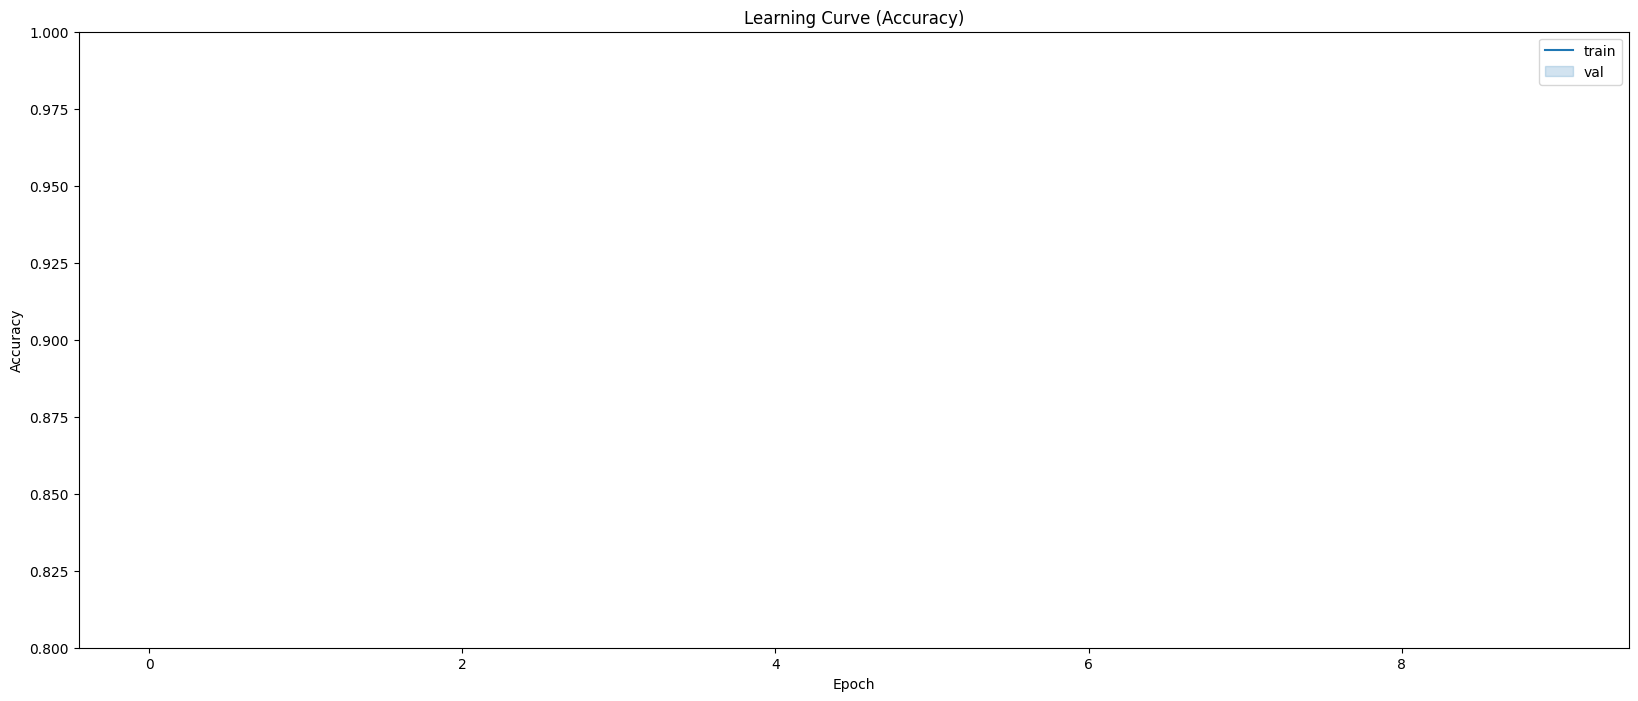

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [29]:
score = model.evaluate(val_ds, steps = len(val_ds), verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 3.9945425987243652
Val accuracy: 0.7380496859550476
